In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import zscore

In [97]:
# Read and view the dataset
# Read the CSV file and replace blank cells with NaN
MH = pd.read_csv("MissionHospitalMLB(csv).csv", na_values=["", " ", "NA"], keep_default_na=False)

In [98]:
MH.columns

Index(['SL.', 'AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL ', 'TOTAL AMOUNT BILLED TO THE PATIENT',
       'CONCESSION', 'ACTUAL RECEIVABLE AMOUNT', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'COST OF IMPLANT'],
      dtype='object')

In [99]:
# Clean column names by removing extra spaces
MH.columns = MH.columns.str.strip()

In [100]:
MH.head(10)

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,...,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,1,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,...,EMERGENCY,660293.00,474901,0,474901,25,12,13,Y,38000
1,2,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,...,EMERGENCY,809130.00,944819,96422,848397,41,20,21,Y,39690
2,3,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,...,ELECTIVE,362231.00,390000,30000,360000,18,9,9,N,0
3,4,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,...,EMERGENCY,629990.00,324910,0,324910,14,13,1,Y,89450
4,5,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,...,EMERGENCY,444876.00,254673,10000,244673,24,12,12,N,0
5,6,75.0,M,MARRIED,CAD-DVD,45,140,130,215.0,140.0,...,EMERGENCY,372357.00,499987,0,499987,31,9,22,N,0
6,7,73.0,M,MARRIED,CAD-TVD,60,170,108,160.0,90.0,...,ELECTIVE,887350.00,660504,504,660000,15,15,0,N,0
7,8,71.0,M,MARRIED,CAD-TVD,44,164,60,130.0,90.0,...,EMERGENCY,389827.00,248580,0,248580,24,11,13,N,0
8,9,72.0,M,MARRIED,CAD-DVD,72,174,95,100.0,50.0,...,EMERGENCY,437529.07,691297,0,691297,26,9,17,N,0
9,10,61.0,M,MARRIED,CAD-TVD,77,175,66,140.0,90.0,...,ELECTIVE,364222.00,247654,0,247654,20,4,16,N,0


In [101]:
MH.describe()

,SL.,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000,248.0000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879839,37.536290,130.221774,92.229839,115.022222,71.875556,23.540323,12.934959,26.581702,0.746977,198723.330282,182721.3750,17642.818548,167894.399194,11.612903,3.475806,8.153226,8544.201613
std,71.735626,25.899358,23.122248,39.170901,20.308740,22.536368,15.313176,3.840756,3.099019,15.998367,0.548641,122587.492984,102104.1345,19992.417896,109345.870984,5.392617,3.853520,3.755793,21521.877503
min,1.000000,0.030000,2.000000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,46093.000000,43641.0000,0.000000,31000.000000,3.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,15.000000,105.000000,78.000000,100.000000,60.000000,22.000000,11.000000,18.000000,0.300000,131652.750000,150000.0000,0.000000,112500.000000,8.000000,1.000000,6.000000,0.000000
50%,124.500000,15.500000,41.000000,147.500000,90.000000,110.000000,70.000000,24.000000,12.000000,22.000000,0.700000,162660.500000,150000.0000,10000.000000,122400.000000,10.000000,2.000000,7.000000,0.000000
75%,186.250000,55.000000,58.250000,160.000000,104.000000,130.000000,80.000000,24.000000,14.000000,30.000000,1.000000,220614.000000,202638.5000,37500.000000,197000.000000,13.000000,4.000000,10.000000,0.000000
max,248.000000,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,26.000000,143.000000,5.200000,887350.000000,944819.0000,123132.000000,848397.000000,41.000000,30.000000,22.000000,196848.000000


In [102]:
# Check the structure and summary of the file
MH.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SL.                                 248 non-null    int64  
 1   AGE                                 248 non-null    float64
 2   GENDER                              248 non-null    object 
 3   MARITAL STATUS                      248 non-null    object 
 4   KEY COMPLAINTS -CODE                212 non-null    object 
 5   BODY WEIGHT                         248 non-null    int64  
 6   BODY HEIGHT                         248 non-null    int64  
 7   HR PULSE                            248 non-null    int64  
 8   BP -HIGH                            225 non-null    float64
 9   BP-LOW                              225 non-null    float64
 10  RR                                  248 non-null    int64  
 11  PAST MEDICAL HISTORY CODE           75 non-nu

In [103]:
MH["STATE AT THE TIME OF ARRIVAL"].value_counts()

ALERT       247
CONFUSED      1
Name: STATE AT THE TIME OF ARRIVAL, dtype: int64

In [104]:
MH["PAST MEDICAL HISTORY CODE"].value_counts()

hypertension1    20
other            15
hypertension2    13
Diabetes1        10
Diabetes2         9
hypertension3     5
Hypertension1     3
Name: PAST MEDICAL HISTORY CODE, dtype: int64

In [105]:
MH.drop(columns = ['SL.', 'PAST MEDICAL HISTORY CODE', 'TOTAL AMOUNT BILLED TO THE PATIENT' ], axis = 1, inplace =True)

In [106]:
MH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           248 non-null    float64
 1   GENDER                        248 non-null    object 
 2   MARITAL STATUS                248 non-null    object 
 3   KEY COMPLAINTS -CODE          212 non-null    object 
 4   BODY WEIGHT                   248 non-null    int64  
 5   BODY HEIGHT                   248 non-null    int64  
 6   HR PULSE                      248 non-null    int64  
 7   BP -HIGH                      225 non-null    float64
 8   BP-LOW                        225 non-null    float64
 9   RR                            248 non-null    int64  
 10  HB                            246 non-null    float64
 11  UREA                          235 non-null    float64
 12  CREATININE                    215 non-null    float64
 13  MODE 

In [107]:
MH["KEY COMPLAINTS -CODE"].value_counts()

other- heart          55
CAD-DVD               27
RHD                   26
CAD-TVD               24
ACHD                  19
other-tertalogy       18
other- respiratory    15
OS-ASD                15
PM-VSD                 6
other-nervous          3
CAD-SVD                2
CAD-VSD                1
other-general          1
Name: KEY COMPLAINTS -CODE, dtype: int64

In [108]:
MH.drop(columns = ['KEY COMPLAINTS -CODE'], axis = 1, inplace =True)

In [109]:
# Remove rows with missing values
MH = MH.dropna()

In [110]:
MH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           191 non-null    float64
 1   GENDER                        191 non-null    object 
 2   MARITAL STATUS                191 non-null    object 
 3   BODY WEIGHT                   191 non-null    int64  
 4   BODY HEIGHT                   191 non-null    int64  
 5   HR PULSE                      191 non-null    int64  
 6   BP -HIGH                      191 non-null    float64
 7   BP-LOW                        191 non-null    float64
 8   RR                            191 non-null    int64  
 9   HB                            191 non-null    float64
 10  UREA                          191 non-null    float64
 11  CREATININE                    191 non-null    float64
 12  MODE OF ARRIVAL               191 non-null    object 
 13  STATE

In [111]:
# Select columns with object data type
object_columns = MH.select_dtypes(include=['object'])

# Create dummy variables for object columns
dummy_columns = pd.get_dummies(object_columns)

# Concatenate the dummy variables with the original DataFrame
MH_with_dummies = pd.concat([MH, dummy_columns], axis=1)

# Drop the original object columns from the DataFrame
MH_with_dummies = MH_with_dummies.drop(object_columns.columns, axis=1)

# Display the DataFrame with dummy variables
MH_with_dummies

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,...,MARITAL STATUS_MARRIED,MARITAL STATUS_UNMARRIED,MODE OF ARRIVAL_AMBULANCE,MODE OF ARRIVAL_TRANSFERRED,MODE OF ARRIVAL_WALKED IN,STATE AT THE TIME OF ARRIVAL_ALERT,TYPE OF ADMSN_ELECTIVE,TYPE OF ADMSN_EMERGENCY,IMPLANT USED (Y/N)_N,IMPLANT USED (Y/N)_Y
0,58.0,49,160,118,100.0,80.0,32,11.0,33.0,0.8,...,1,0,1,0,0,1,0,1,0,1
1,59.0,41,155,78,70.0,50.0,28,11.0,95.0,1.7,...,1,0,1,0,0,1,0,1,0,1
2,82.0,47,164,100,110.0,80.0,20,12.0,15.0,0.8,...,1,0,0,0,1,1,1,0,1,0
3,46.0,80,173,122,110.0,80.0,24,12.0,74.0,1.5,...,1,0,1,0,0,1,0,1,0,1
4,60.0,58,175,72,180.0,100.0,18,10.0,48.0,1.9,...,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,69,176,62,130.0,90.0,24,13.0,26.0,1.1,...,1,0,0,0,1,1,1,0,0,1
244,58.0,57,159,58,100.0,70.0,24,11.0,15.0,0.8,...,1,0,0,0,1,1,1,0,0,1
245,44.0,58,159,68,150.0,90.0,24,15.0,23.0,0.9,...,1,0,0,0,1,1,1,0,1,0
246,60.0,65,165,98,100.0,60.0,17,15.0,36.0,1.0,...,1,0,1,0,0,1,0,1,1,0


In [112]:
# Calculate correlation matrix 
cr =MH_with_dummies.corr()

In [113]:
cr

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,...,MARITAL STATUS_MARRIED,MARITAL STATUS_UNMARRIED,MODE OF ARRIVAL_AMBULANCE,MODE OF ARRIVAL_TRANSFERRED,MODE OF ARRIVAL_WALKED IN,STATE AT THE TIME OF ARRIVAL_ALERT,TYPE OF ADMSN_ELECTIVE,TYPE OF ADMSN_EMERGENCY,IMPLANT USED (Y/N)_N,IMPLANT USED (Y/N)_Y
AGE,1.000000,0.834338,0.716080,-0.427178,0.608689,0.492448,-0.242513,-0.171884,0.232930,0.649351,...,0.887651,-0.887651,0.454147,0.012880,-0.435065,NaN,-0.472528,0.472528,-0.158401,0.158401
BODY WEIGHT,0.834338,1.000000,0.840288,-0.526303,0.611532,0.519687,-0.306191,-0.096891,0.166868,0.653927,...,0.832173,-0.832173,0.353431,0.007760,-0.337712,NaN,-0.349545,0.349545,-0.222019,0.222019
BODY HEIGHT,0.716080,0.840288,1.000000,-0.482480,0.528344,0.457370,-0.292538,-0.041635,0.161272,0.585920,...,0.694678,-0.694678,0.247054,-0.002203,-0.233142,NaN,-0.257618,0.257618,-0.298116,0.298116
HR PULSE,-0.427178,-0.526303,-0.482480,1.000000,-0.301050,-0.211457,0.319756,0.074079,-0.008514,-0.327813,...,-0.419607,0.419607,-0.089130,0.013810,0.079120,NaN,0.125985,-0.125985,0.082331,-0.082331
BP -HIGH,0.608689,0.611532,0.528344,-0.301050,1.000000,0.770687,-0.085707,-0.053070,0.061287,0.426758,...,0.569223,-0.569223,0.234953,0.047616,-0.240783,NaN,-0.228352,0.228352,0.000682,-0.000682
BP-LOW,0.492448,0.519687,0.457370,-0.211457,0.770687,1.000000,-0.060046,0.082570,0.026407,0.293760,...,0.450470,-0.450470,0.220477,-0.040790,-0.193175,NaN,-0.220375,0.220375,-0.062936,0.062936
RR,-0.242513,-0.306191,-0.292538,0.319756,-0.085707,-0.060046,1.000000,0.000259,0.061432,-0.127644,...,-0.203069,0.203069,0.026756,0.046983,-0.043355,NaN,0.022199,-0.022199,-0.076309,0.076309
HB,-0.171884,-0.096891,-0.041635,0.074079,-0.053070,0.082570,0.000259,1.000000,-0.083562,-0.230883,...,-0.130610,0.130610,-0.071094,-0.104449,0.107382,NaN,0.075086,-0.075086,0.072518,-0.072518
UREA,0.232930,0.166868,0.161272,-0.008514,0.061287,0.026407,0.061432,-0.083562,1.000000,0.562697,...,0.231527,-0.231527,0.424176,0.012052,-0.406362,NaN,-0.416380,0.416380,-0.243664,0.243664
CREATININE,0.649351,0.653927,0.585920,-0.327813,0.426758,0.293760,-0.127644,-0.230883,0.562697,1.000000,...,0.627776,-0.627776,0.467624,0.147074,-0.499282,NaN,-0.472694,0.472694,-0.156284,0.156284


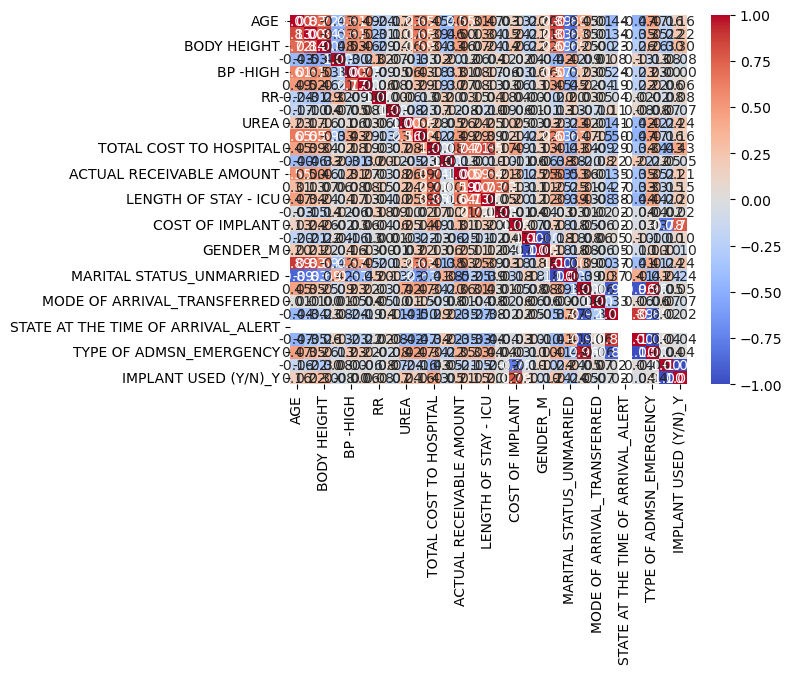

In [114]:
# Plot correlation chart (dots)
sns.heatmap(cr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

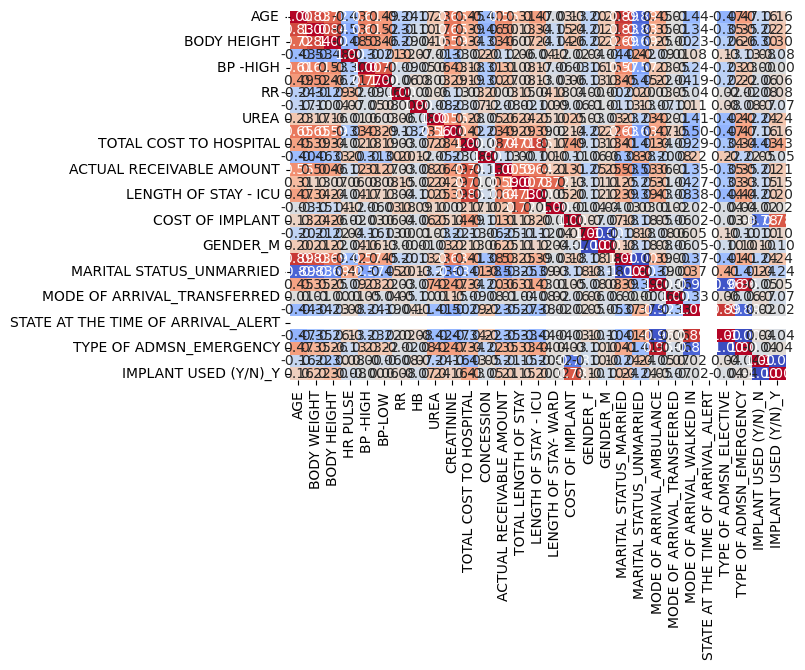

In [115]:
# Plot correlation chart (numbers)
sns.heatmap(cr, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.show()

In [116]:
# Write correlation to CSV
cr.to_csv("MH_COR.csv")

In [117]:
# creating list of important features having high corelation with dependent cariable
imp_features = ["AGE", "BODY WEIGHT", "TOTAL LENGTH OF STAY",
                "LENGTH OF STAY - ICU", "COST OF IMPLANT",
                "TYPE OF ADMSN_EMERGENCY", "IMPLANT USED (Y/N)_Y"]

In [118]:
imp_features 

['AGE',
 'BODY WEIGHT',
 'TOTAL LENGTH OF STAY',
 'LENGTH OF STAY - ICU',
 'COST OF IMPLANT',
 'TYPE OF ADMSN_EMERGENCY',
 'IMPLANT USED (Y/N)_Y']

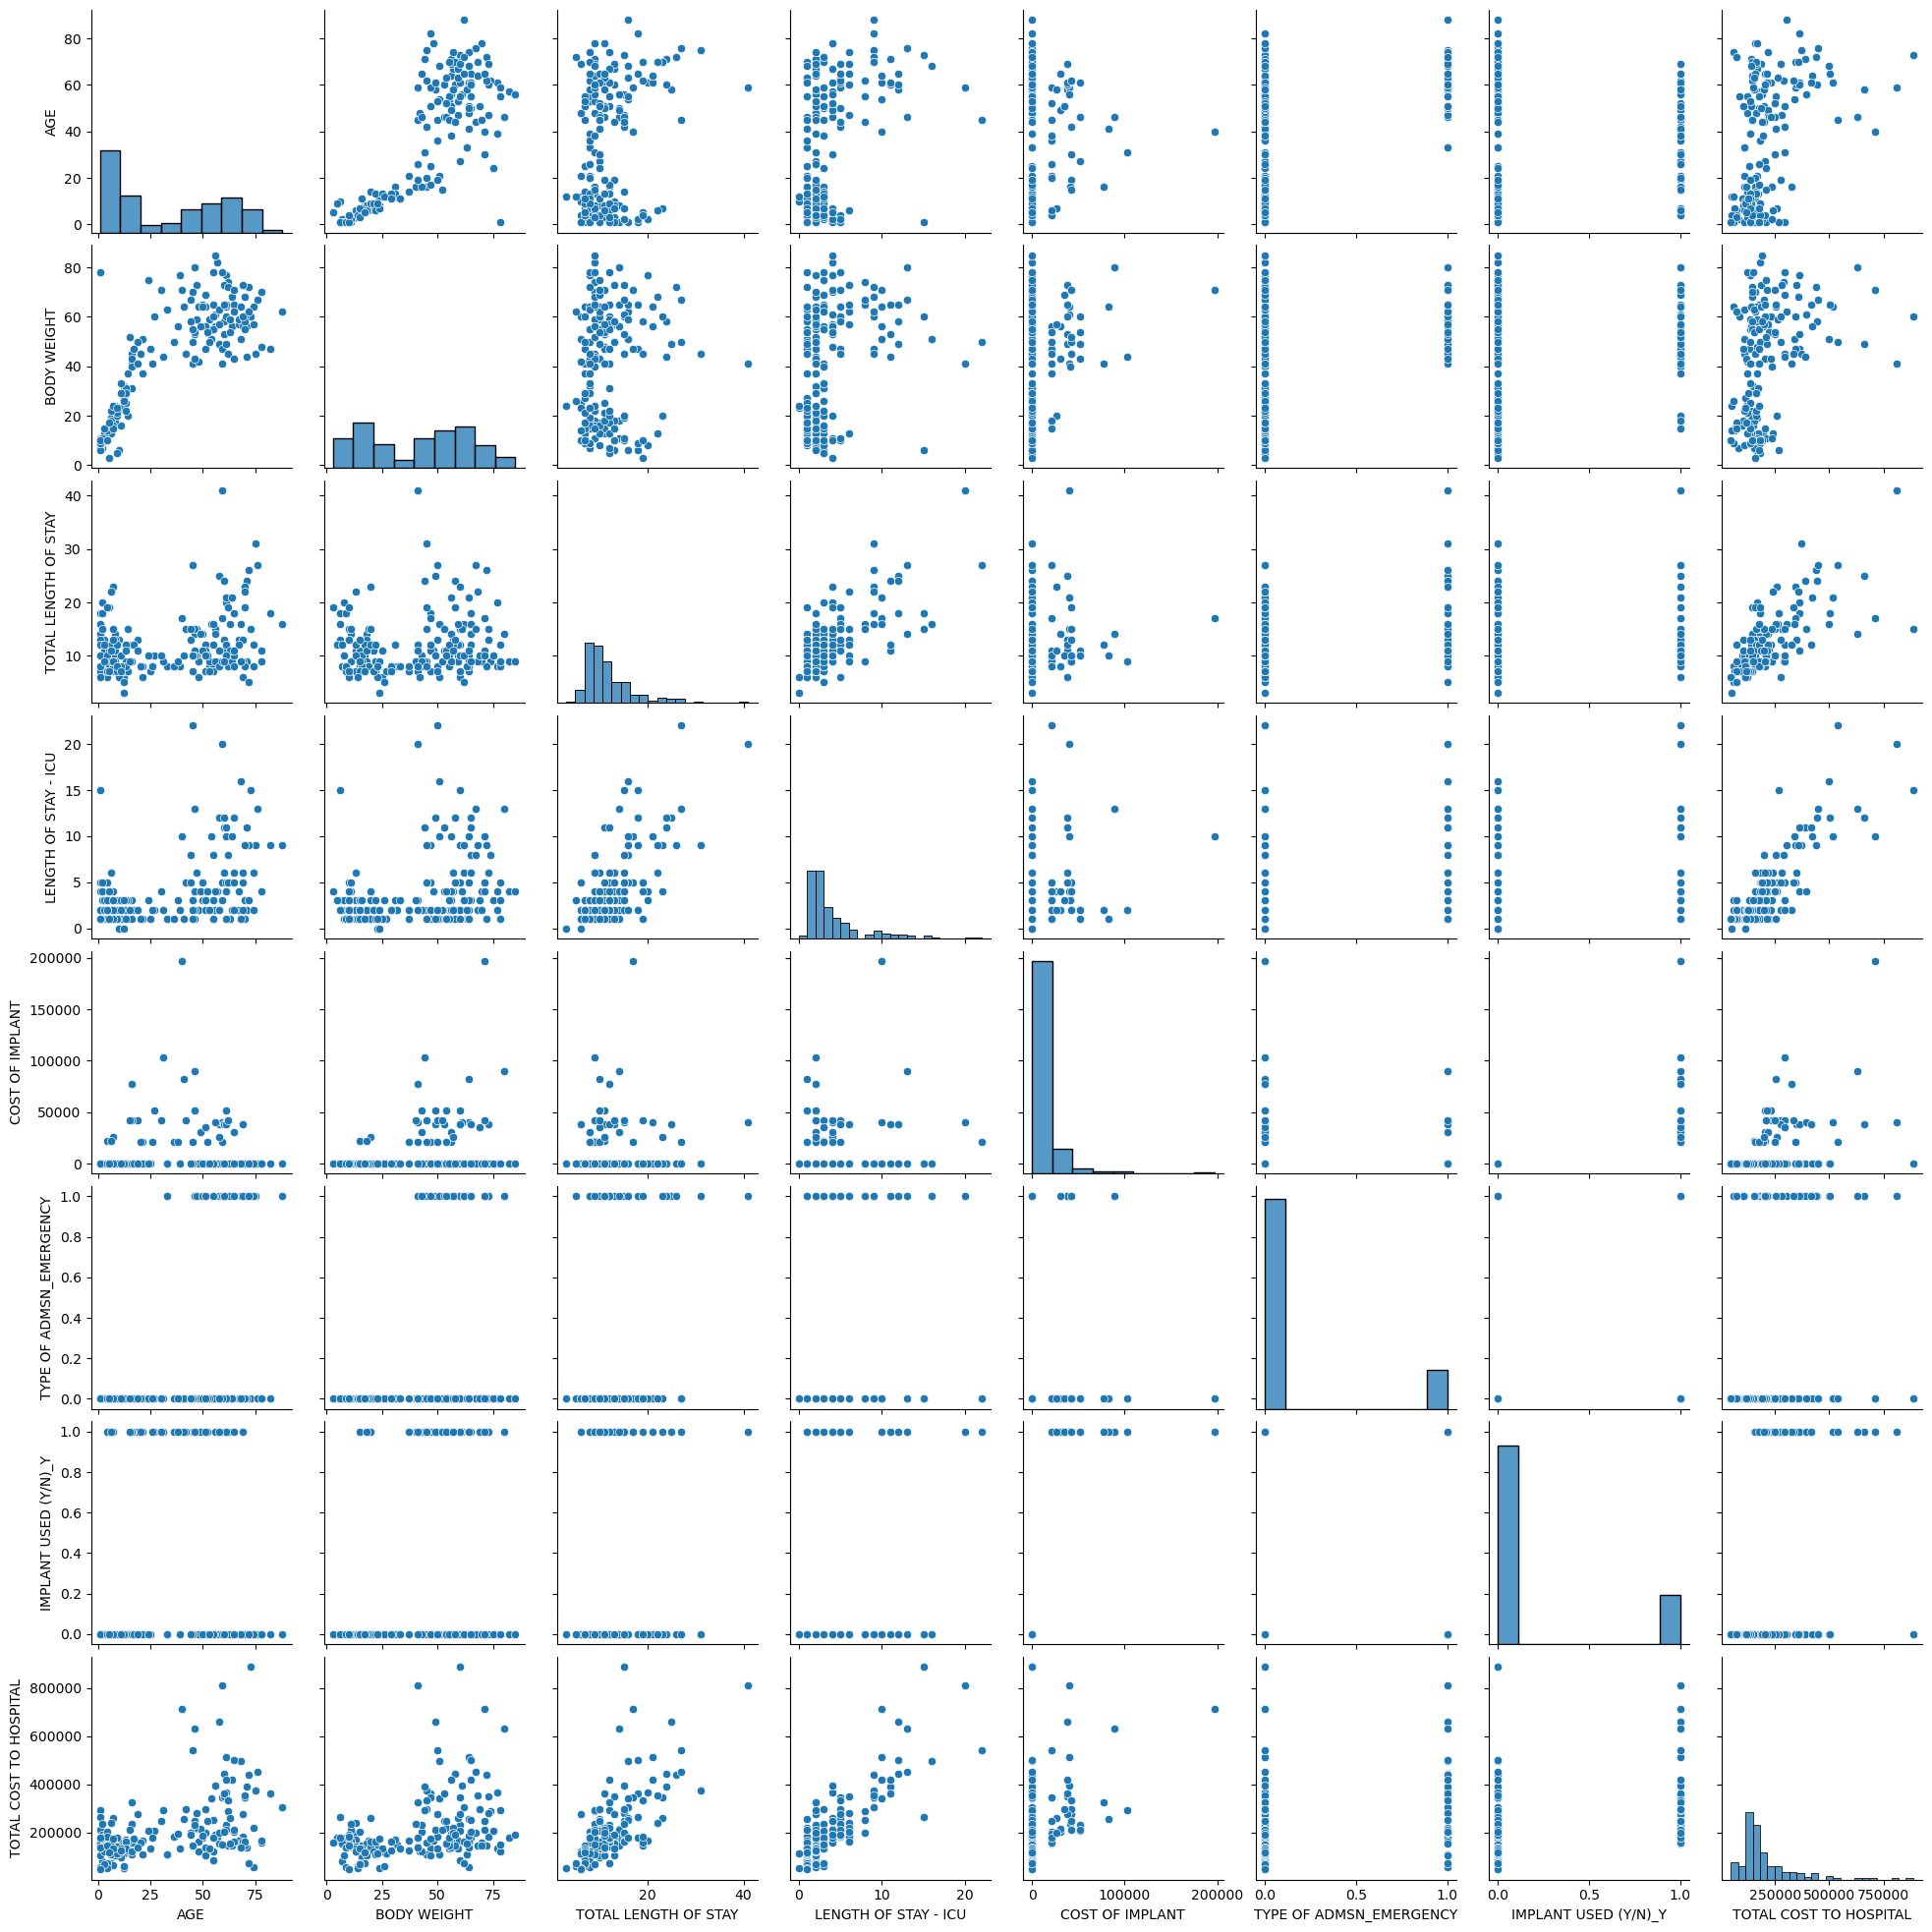

In [119]:
selected_features = MH_with_dummies[imp_features]

# Combine the selected features with the target variable
pairplot_data = pd.concat([selected_features, MH_with_dummies["TOTAL COST TO HOSPITAL"]], axis=1)

# Create a pairplot
sns.pairplot(pairplot_data)
plt.show()

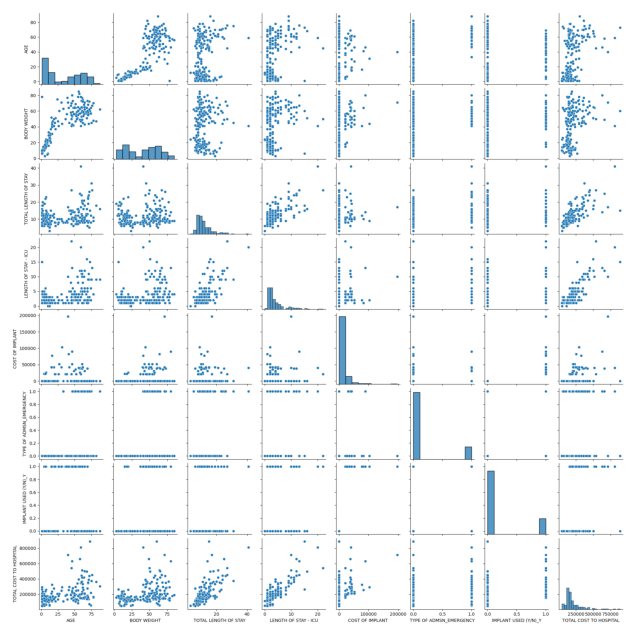

In [120]:
# Create a pairplot
pairplot = sns.pairplot(pairplot_data)

# Save the pairplot as an image
pairplot.savefig("pairplot.png")

# Display the image in another tab
plt.close()  # Close the original plot to avoid displaying it
plt.figure(figsize=(10, 8))
img = plt.imread("pairplot.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [121]:
#Transform the variable
MH_with_dummies['TOTAL COST TO HOSPITAL'] = np.log10(MH_with_dummies['TOTAL COST TO HOSPITAL'])

In [124]:
# Linear regression model
models = [
 ['AGE'], 
 ['AGE', 'BODY WEIGHT'], 
 ['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY'], 
 ['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU'],
 ['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT'],
 ['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT', 'TYPE OF ADMSN_EMERGENCY'],
 ['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT', 'TYPE OF ADMSN_EMERGENCY', 'IMPLANT USED (Y/N)_Y']
]

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.234
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     57.70
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           1.37e-12
Time:                            04:10:37   Log-Likelihood:                 37.479
No. Observations:                     191   AIC:                            -70.96
Df Residuals:                         189   BIC:                            -64.45
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

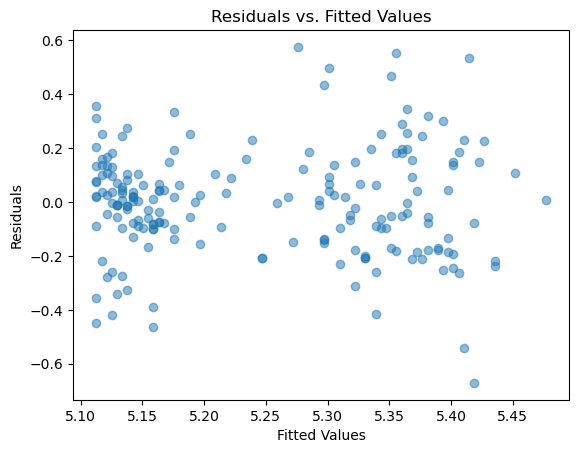

In [125]:
# MODEL-1
# Prepare the feature matrix and target variable
X = MH_with_dummies[['AGE']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.238
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     29.34
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           8.16e-12
Time:                            04:11:00   Log-Likelihood:                 37.976
No. Observations:                     191   AIC:                            -69.95
Df Residuals:                         188   BIC:                            -60.19
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

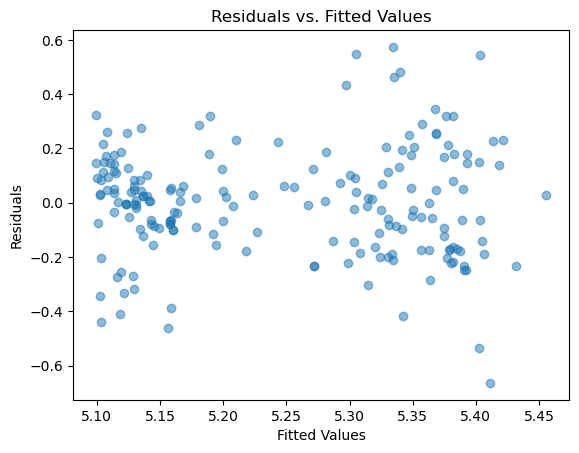

In [128]:
# MODEL-2
# Prepare the feature matrix and target variable
X = MH_with_dummies[['AGE', 'BODY WEIGHT']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.619
Model:                                OLS   Adj. R-squared:                  0.613
Method:                     Least Squares   F-statistic:                     101.4
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           5.14e-39
Time:                            04:11:33   Log-Likelihood:                 104.29
No. Observations:                     191   AIC:                            -200.6
Df Residuals:                         187   BIC:                            -187.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

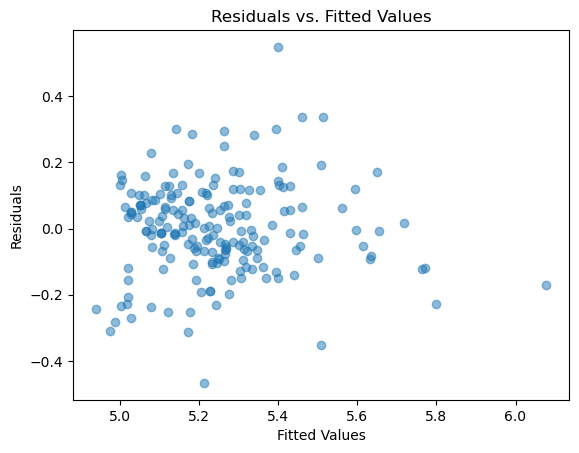

In [130]:
# MODEL-3
# Prepare the feature matrix and target variable
X = MH_with_dummies[['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.701
Model:                                OLS   Adj. R-squared:                  0.695
Method:                     Least Squares   F-statistic:                     109.2
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           1.06e-47
Time:                            04:11:46   Log-Likelihood:                 127.42
No. Observations:                     191   AIC:                            -244.8
Df Residuals:                         186   BIC:                            -228.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

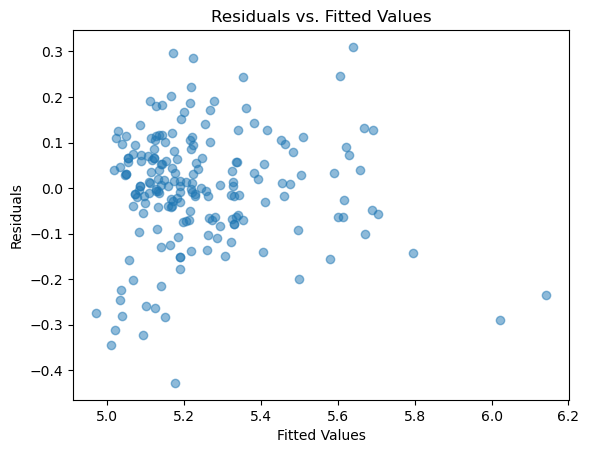

In [131]:
# MODEL-4
# Prepare the feature matrix and target variable
X = MH_with_dummies[['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.776
Model:                                OLS   Adj. R-squared:                  0.770
Method:                     Least Squares   F-statistic:                     128.0
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           4.20e-58
Time:                            04:12:05   Log-Likelihood:                 154.78
No. Observations:                     191   AIC:                            -297.6
Df Residuals:                         185   BIC:                            -278.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

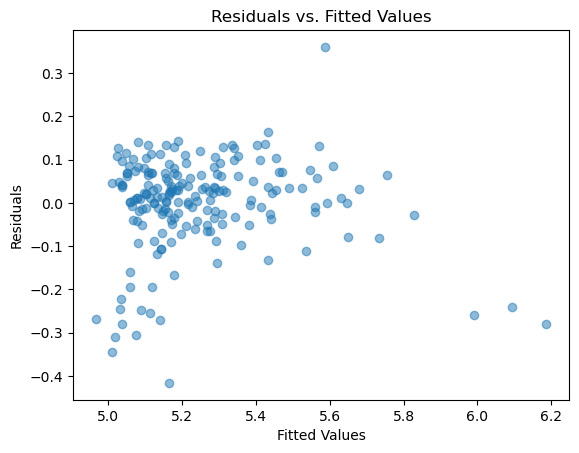

In [133]:
# MODEL-5
# Prepare the feature matrix and target variable
X = MH_with_dummies[ ['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.781
Model:                                OLS   Adj. R-squared:                  0.774
Method:                     Least Squares   F-statistic:                     109.6
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           4.83e-58
Time:                            04:12:15   Log-Likelihood:                 157.23
No. Observations:                     191   AIC:                            -300.5
Df Residuals:                         184   BIC:                            -277.7
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

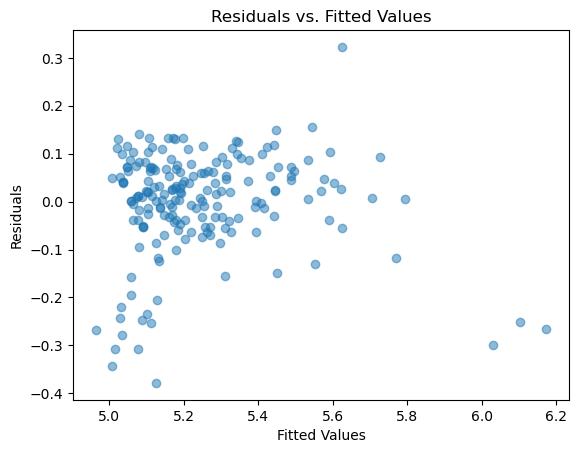

In [134]:
# MODEL-6
# Prepare the feature matrix and target variable
X = MH_with_dummies[['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT', 'TYPE OF ADMSN_EMERGENCY']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.790
Model:                                OLS   Adj. R-squared:                  0.782
Method:                     Least Squares   F-statistic:                     98.50
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           1.21e-58
Time:                            04:12:32   Log-Likelihood:                 161.20
No. Observations:                     191   AIC:                            -306.4
Df Residuals:                         183   BIC:                            -280.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

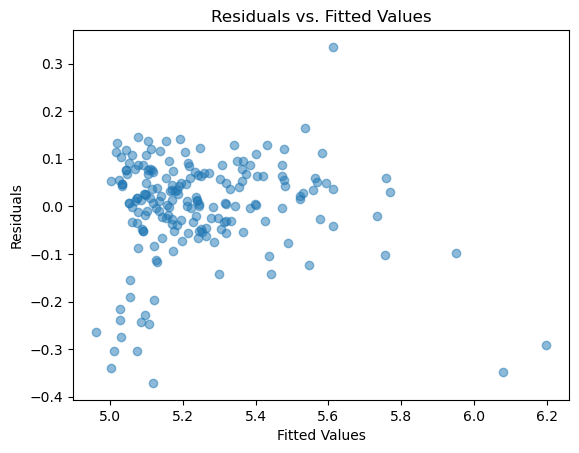

In [136]:
# MODEL-7
# Prepare the feature matrix and target variable
X = MH_with_dummies[['AGE', 'BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT', 'TYPE OF ADMSN_EMERGENCY', 'IMPLANT USED (Y/N)_Y']]
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.776
Model:                                OLS   Adj. R-squared:                  0.771
Method:                     Least Squares   F-statistic:                     160.7
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           3.24e-59
Time:                            04:19:02   Log-Likelihood:                 154.74
No. Observations:                     191   AIC:                            -299.5
Df Residuals:                         186   BIC:                            -283.2
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

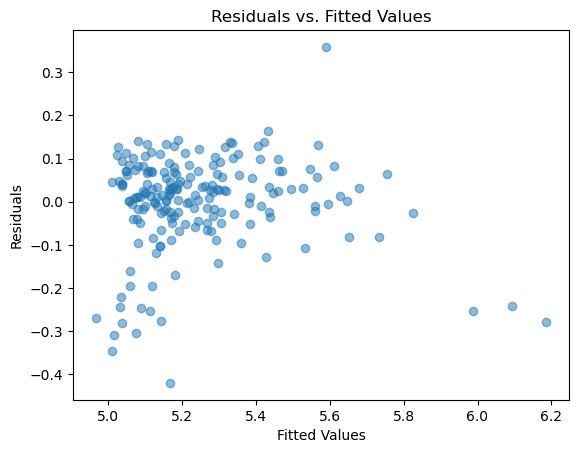

In [147]:
#MODEL-8
# Prepare the feature matrix and target variable
X = MH_with_dummies[['BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

# Fit linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict target variable
predictions = model_sklearn.predict(X)

# Calculate residuals
residuals = y - predictions

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF DataFrame
print(vif)

    
# Perform the White test for heteroscedasticity using statsmodels
X_with_const = sm.add_constant(X)
_, p_value, _, _ = sms.het_white(residuals, X_with_const)
print(f'White Test p-value: {p_value}')

# Visualize residuals vs. fitted values
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [151]:
model_sklearn.score(X, y)

0.775593695093171

In [139]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(152, 4)
(39, 4)


In [154]:
#MODEL-8
# Prepare the feature matrix and target variable
X = MH_with_dummies[['BODY WEIGHT', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'COST OF IMPLANT']].apply(zscore)
y = MH_with_dummies["TOTAL COST TO HOSPITAL"]

X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

# Fit the same model using statsmodels for summary
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()
    
 # Print model summary
print(model_sm.summary())

(152, 4)
(39, 4)
                              OLS Regression Results                              
Dep. Variable:     TOTAL COST TO HOSPITAL   R-squared:                       0.772
Model:                                OLS   Adj. R-squared:                  0.765
Method:                     Least Squares   F-statistic:                     124.1
Date:                    Sun, 10 Dec 2023   Prob (F-statistic):           4.33e-46
Time:                            04:25:40   Log-Likelihood:                 116.15
No. Observations:                     152   AIC:                            -222.3
Df Residuals:                         147   BIC:                            -207.2
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [155]:
reg = LinearRegression().fit(X_train, y_train)

In [156]:
reg.score(X_train, y_train)

0.7715203944767173

In [158]:
y_pred = reg.predict(X_test)

In [144]:
reg.score(X_train, y_train)

In [145]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1185060921.010311
RMSE : 34424.713811596324


In [146]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.852482901546334
Adjusted R2 :  0.8351279487870792
